# Import data

In [2]:
#allow for autoreload of packages
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
from ps_from_rawdf import restrict_to_bvn, expand_bv_df_to_all_marks

In [5]:
file = open('../data/ibm_cairo/20220412/rawdf_cairo_dd-ur18-ur42_marks-all_embedding-2.p', 'rb')
data = pickle.load(file)
file.close()

In [28]:
pltfree = expand_bv_df_to_all_marks(restrict_to_bvn(data, ['free'], 6, all_counts=True))
pltdd = expand_bv_df_to_all_marks(restrict_to_bvn(data, ['ur_18'], 6, all_counts=True))
pltfree = pltfree.sort_index(axis=1)
pltdd = pltdd.sort_index(axis=1)

# Plot

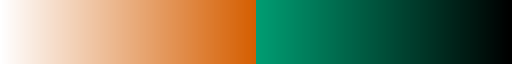

In [30]:
import matplotlib as mpl
import numpy as np
thresh = 0.5
nodes = [0,thresh, thresh, 1.0]

colors = ["white", "#d55e00", "#009e73", "black"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("", list(zip(nodes, colors)))
cmap.set_under("white")
cmap

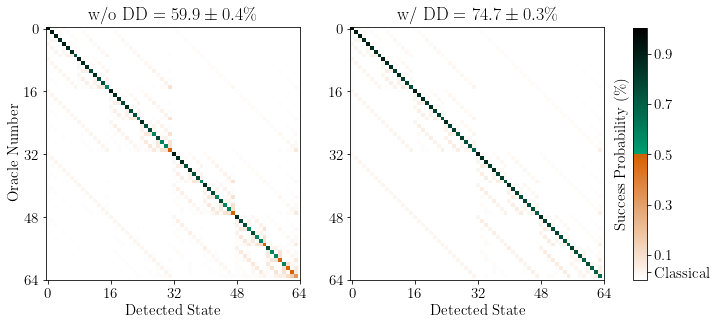

In [31]:
plt.rcParams["font.family"] = "Latin Modern Math"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["text.usetex"] = True

n=6
fig,axs = plt.subplots(1,2)
xaxis = np.arange(2**n+1)[::16]
yaxis = np.arange(2**n+1)[::16]

#divnorm=colors.LogNorm(vmin=2/2**n, vmax=2/3)
#divnorm=mpl.colors.TwoSlopeNorm(vmin=2/2**n, vcenter=0.5,vmax=2/3)

axs[0].matshow(pltfree,  interpolation ='nearest',cmap =cmap, vmin=0, vmax=1.0)
cax = axs[1].matshow(pltdd, interpolation ='nearest', cmap=cmap, vmin=0, vmax=1.0)
axs[0].set_title(f'w/o DD = $59.9 \pm 0.4\%$')
axs[1].set_title('w/ DD = $74.7 \\pm 0.3\%$')

axs[0].set_ylabel('Oracle Number')
axs[0].set_xlabel('Detected State')
axs[1].set_xlabel('Detected State')

for ax in axs:
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    #ax.set_xticklabels(alphabets, rotation=45)
    #ax.set_yticklabels(alphabets)
    ax.xaxis.set_ticks_position('bottom')
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_ticks([2/2**n,0.1, 0.3, 0.5, 0.7, 0.9])
cbar.set_ticklabels(['Classical',0.1, 0.3, 0.5, 0.7, 0.9])
#cbar.ax.text(-0.1, 0.125, '----- Classical')
cbar.ax.set_ylabel("Success Probability (\%)")
cbar.ax.yaxis.set_label_position("left")
plt.savefig('../results/bv_cairo_dd_array.pdf',dpi=300, bbox_inches = "tight")
plt.show()